In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
from PIL import Image as im

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
y_one_hot = tf.one_hot(y_train.astype('float32'), 10)
print(y_one_hot.shape)

(60000, 10)


In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
def Categorical_encoder(latent_dimensionality):
    
    x = tfl.Input(shape = (28,28))
    x_flatten = tfl.Flatten()(x)
    
    x_fp = tfl.Dense(600, activation = 'relu')(x_flatten)
    x_fp = tfl.Dense(400, activation = 'relu')(x_fp)
    x_fp = tfl.Dense(150, activation = 'relu')(x_fp)
    logits = tfl.Dense(latent_dimensionality, activation = 'relu')(x_fp)
    latent_category = tfl.Softmax()(logits)

    
    encoder = tf.keras.Model(inputs = x, outputs = latent_category)
    
    return encoder

def Categorical_decoder(latent_dimensionality):
    
    latent_category = tfl.Input(shape = (latent_dimensionality))
    y = tfl.Dense(150, activation = 'relu')(latent_category)
    y = tfl.Dense(400, activation = 'relu')(y)
    y = tfl.Dense(600, activation = 'relu')(y)
    y = tfl.Dense(784, activation = 'sigmoid')(y)
    y = tfl.Reshape((28,28))(y)
    
    decoder = tf.keras.Model(inputs = latent_category, outputs = y)
    
    return decoder

In [46]:
my_encoder = Categorical_encoder(10)
my_decoder = Categorical_decoder(10)

In [47]:
latent_category = my_encoder(my_encoder.inputs)
reconstructions = my_decoder(latent_category)
my_autoencoder = tf.keras.Model(inputs = my_encoder.inputs, outputs = [reconstructions, latent_category])

In [184]:
def combined_loss():

    def loss(y_true,y_pred):

        loss_binary_crossentropy =  tf.keras.losses.mean_squared_error(y_true[0], y_pred[0])
        latent_categorical_loss = 100 * tf.keras.losses.categorical_crossentropy(y_true[1], y_pred[1])     
        sharpening_loss = 1000000/ tf.keras.losses.mean_squared_error(120, y_pred[0])
        
        return loss_binary_crossentropy + latent_categorical_loss + sharpening_loss
   
    return loss

In [120]:
my_encoder.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  optimizer = 'adam', metrics = ['accuracy'])

In [121]:
my_encoder.fit(x = x_train, y = y_one_hot, epochs = 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0918 - accuracy: 0.9803
Epoch 2/10
600/600 [==============================] - 9s 14ms/step - loss: 0.0361 - accuracy: 0.9917
Epoch 3/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0185 - accuracy: 0.9953
Epoch 4/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0093 - accuracy: 0.9975
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0090 - accuracy: 0.9977
Epoch 6/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0103 - accuracy: 0.9975
Epoch 7/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 8/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0063 - accuracy: 0.9985
Epoch 9/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 10/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0061 - accur

In [88]:
my_encoder.trainable = True

In [78]:
my_autoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 model_12 (Functional)       (None, 10)                773060    
                                                                 
 model_13 (Functional)       (None, 28, 28)            773834    
                                                                 
Total params: 1,546,894
Trainable params: 773,834
Non-trainable params: 773,060
_________________________________________________________________


In [185]:
my_autoencoder.compile(loss = combined_loss(), optimizer = 'adam', metrics = ['accuracy'])

In [186]:
my_autoencoder.fit(x = x_train, y = [x_train, y_one_hot], epochs = 10, batch_size = 50)

Epoch 1/10
1200/1200 [==============================] - 24s 19ms/step - loss: 1142.0460 - model_13_loss: 1044.1169 - model_12_loss: 97.9288 - model_13_accuracy: 0.1113 - model_12_accuracy: 0.9532
Epoch 2/10
1200/1200 [==============================] - 24s 20ms/step - loss: 1122.9606 - model_13_loss: 1031.4990 - model_12_loss: 91.4624 - model_13_accuracy: 0.1102 - model_12_accuracy: 0.9510
Epoch 3/10
1200/1200 [==============================] - 22s 19ms/step - loss: 1129.1388 - model_13_loss: 1037.1813 - model_12_loss: 91.9588 - model_13_accuracy: 0.1117 - model_12_accuracy: 0.9460
Epoch 4/10
1200/1200 [==============================] - 25s 21ms/step - loss: 1122.2626 - model_13_loss: 1025.2780 - model_12_loss: 96.9844 - model_13_accuracy: 0.1122 - model_12_accuracy: 0.9518
Epoch 5/10
1200/1200 [==============================] - 24s 20ms/step - loss: 1132.9792 - model_13_loss: 1033.2473 - model_12_loss: 99.7335 - model_13_accuracy: 0.1131 - model_12_accuracy: 0.9482
Epoch 6/10
1200/1200

In [187]:
sample = 3

Sample: 6
1/1 [==============================] - 0s 23ms/step


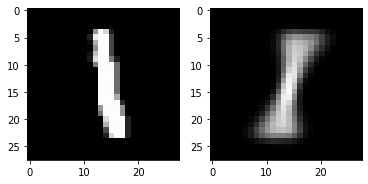

In [191]:
print('Sample: ' + str(sample))
task = x_train[sample,:,:].reshape(1,28,28)
tip = my_autoencoder.predict(task)
tip = tip[0]
task_img = im.fromarray(255 * task.reshape(28,28))
tip_img = im.fromarray(255 * tip.reshape(28,28))
plt.subplot(1, 2, 1)
plt.imshow(task_img)
plt.subplot(1, 2, 2)
plt.imshow(tip_img)
plt.show() 
sample += 1

1/1 [==============================] - 0s 23ms/step


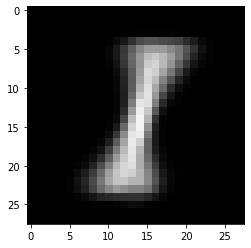

1/1 [==============================] - 0s 23ms/step


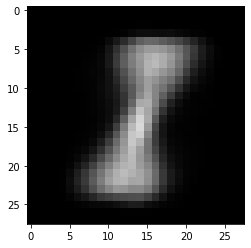

1/1 [==============================] - 0s 22ms/step


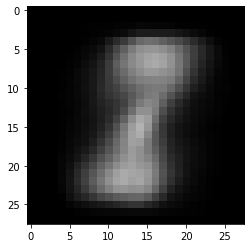

1/1 [==============================] - 0s 22ms/step


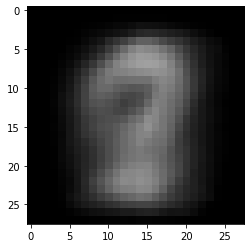

1/1 [==============================] - 0s 29ms/step


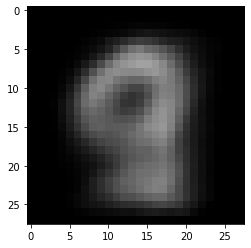

1/1 [==============================] - 0s 22ms/step


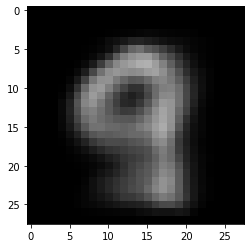

In [155]:
task1 = x_train[8,:,:].reshape(1,28,28)
task2 = x_train[22,:,:].reshape(1,28,28)
my_code1 = my_encoder.predict(task1)
my_code2 = my_encoder.predict(task2)

steps = 6
step = (my_code1 - my_code2) / steps

latent_code = my_code1

for mutation in range(steps):
    my_tip = my_decoder.predict(latent_code)
    my_tip_img = im.fromarray(255 * my_tip.reshape(28,28))
    plt.imshow(my_tip_img)
    plt.show()
    latent_code -= step

1/1 [==============================] - 0s 32ms/step


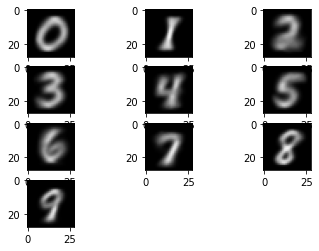

In [192]:
for i in range (10):
    latent_cat = tf.reshape(tf.one_hot(i, 10), (1,-1))
    latent_idea = my_decoder.predict(latent_cat)
    latent_idea = latent_idea[0]
    latent_img = im.fromarray(255 * latent_idea.reshape(28,28))
    plt.subplot(4, 3, i + 1)
    plt.imshow(latent_img)
plt.show()